In [3]:
import keras
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
pip install pillow

### Viewing the samples image of some classes

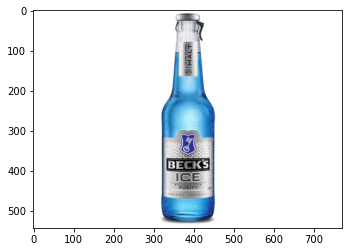

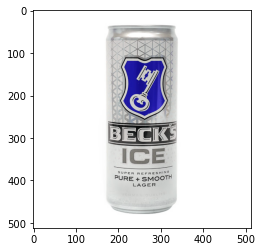

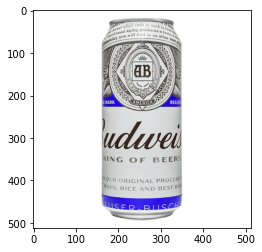

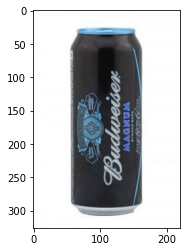

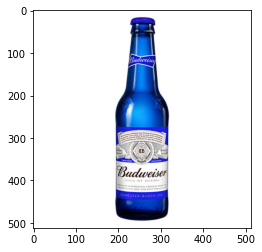

In [18]:
files = os.listdir("C:/Users/Siddhesh/Pictures/Shelfmonitoring/Product Images")
i = 1;
for j in files:
    
    img = cv2.imread("C:/Users/Siddhesh/Pictures/Shelfmonitoring/Product Images/" + j)
    plt.figure()
    plt.imshow(img)
    i = i +1
    if i >5:
        break              
                

### Data Augmentation: Generating multiple images for training from single image

In [19]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest')


path = "C:/Users/Siddhesh/Pictures/Shelfmonitoring/Product Images/"
    
files = os.listdir(path)

k = 1 #initiate class label

for j in files:

    img = load_img(path + j)  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array 
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    
    
    folder = os.path.join(path, str(k))
     
    os.mkdir(folder)
    
    
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=folder, save_prefix=str(k), save_format='jpg'):
        i += 1
        if i > 248:
            break  # otherwise the generator would loop indefinitely
            
    k += 1
  

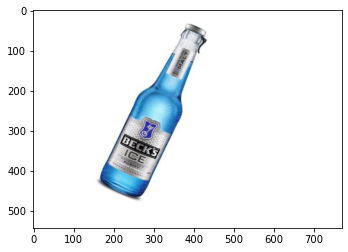

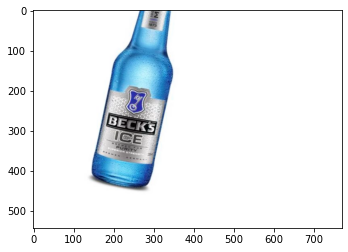

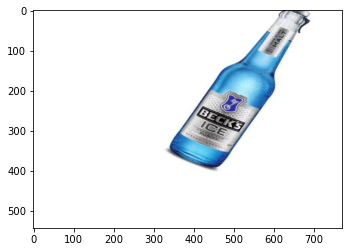

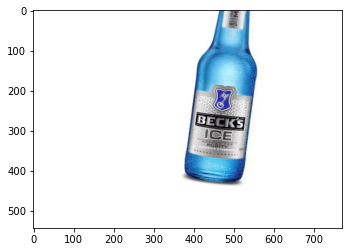

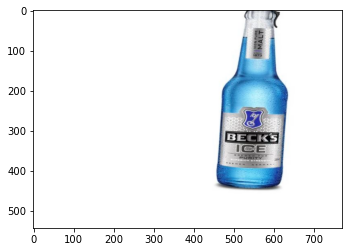

In [20]:
#View augmented images

filescheck = os.listdir("C:/Users/Siddhesh/Pictures/Shelfmonitoring/Product Images/1")
i = 1;
for j in filescheck:
    
    img = cv2.imread("C:/Users/Siddhesh/Pictures/Shelfmonitoring/Product Images/1/" + j)
    plt.figure()
    plt.imshow(img)
    i = i +1
    if i >5:
        break 

## Annoting each image in YOLOv3 format

#### This shall be achieved by cropping off the white/black background of each image
#### and storing the coordinates of the cropped image (wrt original) as box coordinates

#### Thus, the task of manually labeling each and every image is automated

In [23]:
for i in range(len(files)):
    
    
    path2 = "C:/Users/Siddhesh/Pictures/Shelfmonitoring/Product Images/" + str(i+1) +"/"
    
    files2 = os.listdir(path2)
    
    for j in files2:
        
        img = cv2.imread(path2 + j)
             
        th, threshed = cv2.threshold(cv2.imread(path2 + j, 0), 240, 255, cv2.THRESH_BINARY_INV)
        
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
        morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)
        
        cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
        cnt = sorted(cnts, key=cv2.contourArea)[-1]
        
        x,y,w,h = cv2.boundingRect(cnt)
        
        Width = img.shape[1]
        Height = img.shape[0]
        
        xnew = (x + 0.5*w)/Width
        ynew = (y + 0.5*h)/Height
        wnew = w/Width
        hnew = h/Height
        
        annotation = str(i) + " " + str(xnew) + " " + str(ynew) + " " + str(wnew) + " " + str(hnew)
        
        name = os.path.splitext(j)[0] +  ".txt"
        
        n = os.path.join(path, name)
        n = 'C:/Users/Siddhesh/Pictures/Shelfmonitoring/Product Images/' + name
        
        f= open(n,"w+")

        f.write(annotation)
        f.close()
        
        break
    break
    

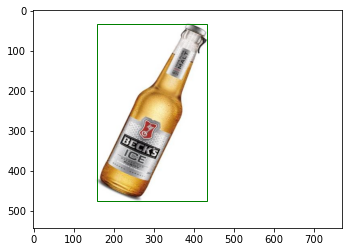

In [29]:
#Check

import matplotlib
img = matplotlib.image.imread("C:/Users/Siddhesh/Pictures/Shelfmonitoring/Product Images/1/1_0_1078.jpg")
figure, ax = plt.subplots(1)
rect = matplotlib.patches.Rectangle((img.shape[1]*(xnew - 0.5*wnew),img.shape[0]*(ynew - 0.5*hnew)),img.shape[1]*wnew,img.shape[0]*hnew, edgecolor='g', facecolor="none")
ax.imshow(img) #Displays an image.
ax. add_patch(rect) #Add rectangle to image 
  